In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Load the iris dataset
df = pd.read_csv("kc_house_data.csv")

In [ ]:
# Display the first five rows of the dataset
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
# Check the shape of the dataset
print(df.shape)

(21613, 21)


In [ ]:
# Check the data types of each column
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Display basic statistics of the dataset
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [9]:
#find duplicate
df.duplicated().sum()

0

In [ ]:
print(df.isnull().sum())  # check for missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# drop irrelevant columns
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

# handle outliers in 'bedrooms' and 'bathrooms' columns
df = df[(data['bedrooms'] < 10) & (data['bathrooms'] < 8)]

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Data Visualization:

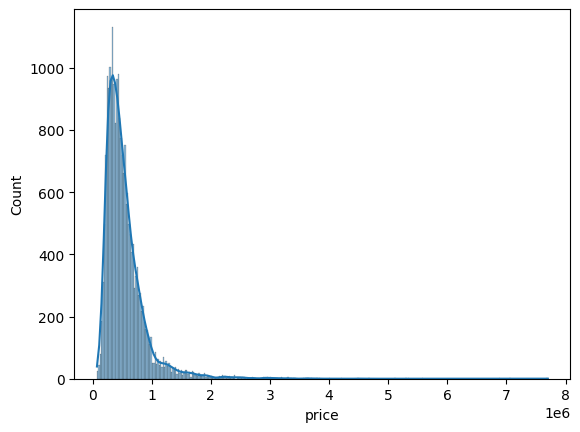

In [ ]:
# create Histogram for price
sns.histplot(df['price'], kde=True)
plt.show()


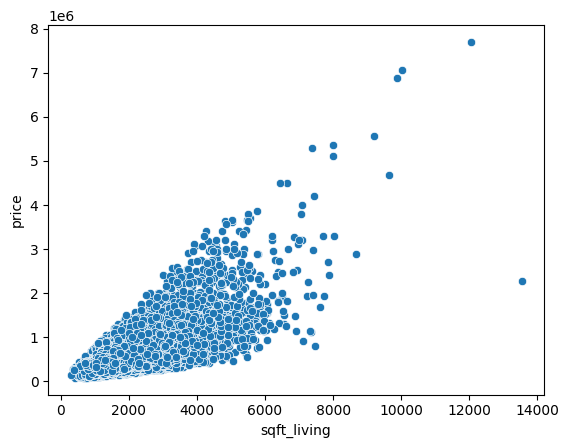

In [ ]:
#Create plot for sqsqft_living and price
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()

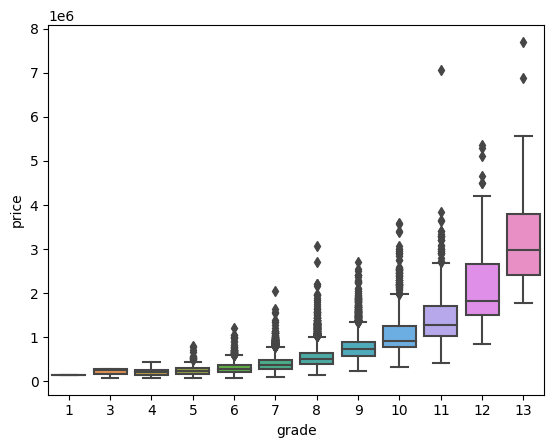

In [ ]:
#Create boxplot for grade and price
sns.boxplot(x='grade', y='price', data=df)
plt.show()

Feature 

In [ ]:
# create a new feature 'age' from 'yr_built' and 'yr_renovated' columns
df['age'] = 2023 - df[['yr_built', 'yr_renovated']].max(axis=1)

In [ ]:
# create a new feature 'renovated' based on 'yr_renovated' column
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# create a new feature 'sqft_per_bedroom' based on 'sqft_living' and 'bedrooms' columns
df['sqft_per_bedroom'] = df['sqft_living'] / df['bedrooms']

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,sqft_per_bedroom
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,68,0,393.333333
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,32,1,856.666667
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,90,0,385.000000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,58,0,490.000000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,36,0,560.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,14,0,510.000000
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,9,0,577.500000
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,14,0,510.000000
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,19,0,533.333333


Correlation Analysis:

<ipython-input-66-804859d69666>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


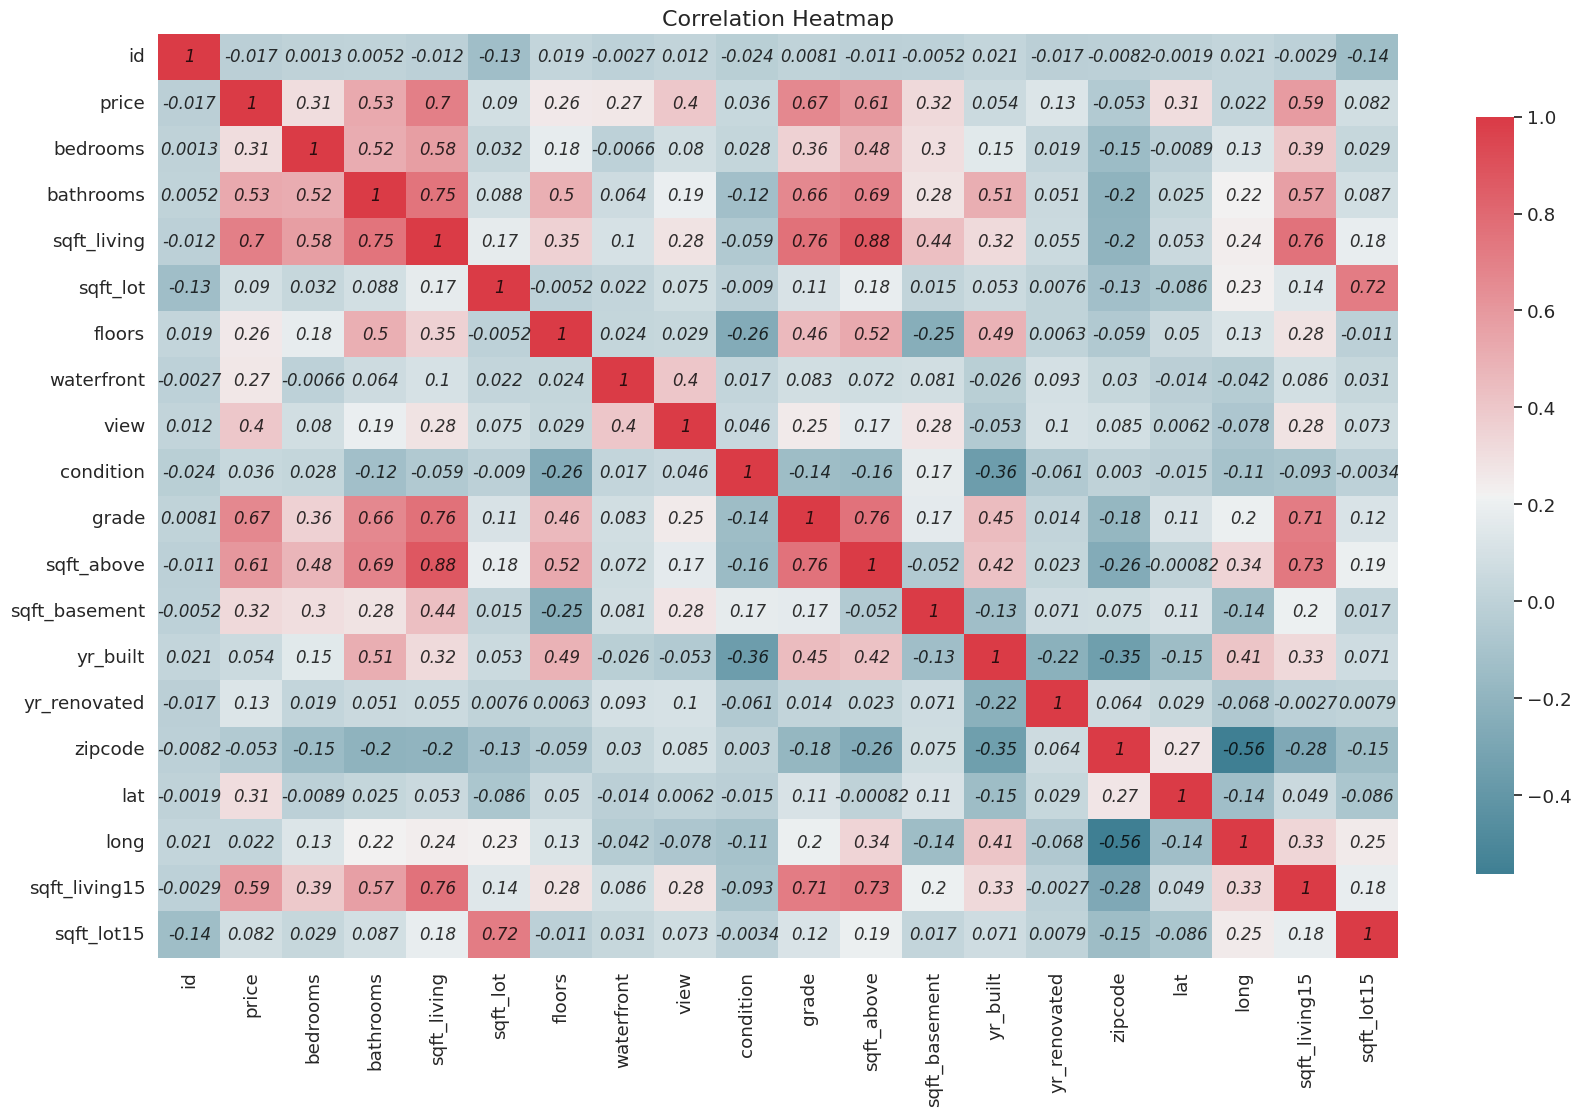

In [ ]:
plt.figure(figsize=(20, 12))
plt.title("Correlation Heatmap", fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=cmap, annot_kws={"fontsize": 12, "fontstyle": "italic", "color": "black", "alpha": 0.8}, cbar_kws={"shrink": .82})
plt.show()

<ipython-input-73-7faeb78f9a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

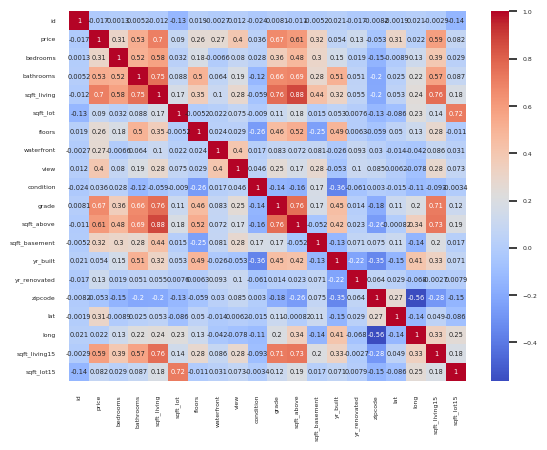

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the font scale
sns.set(font_scale=0.4)

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

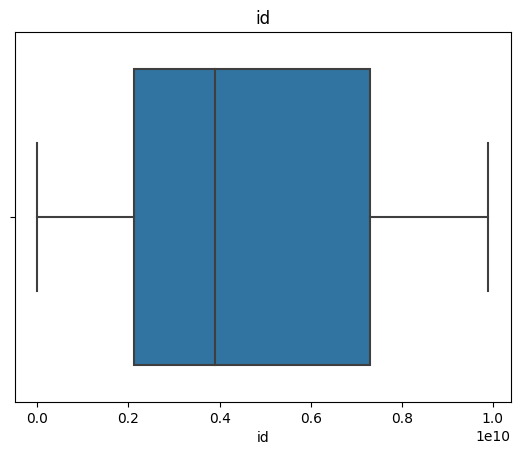

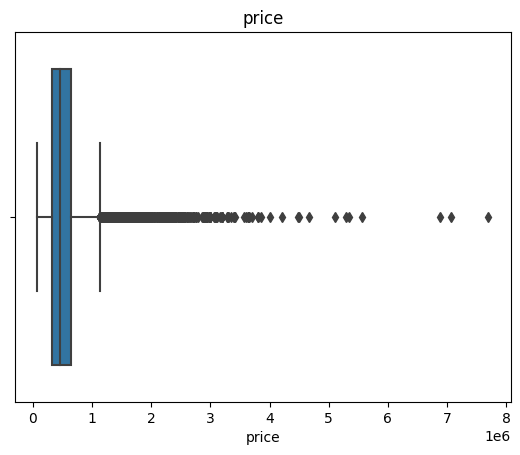

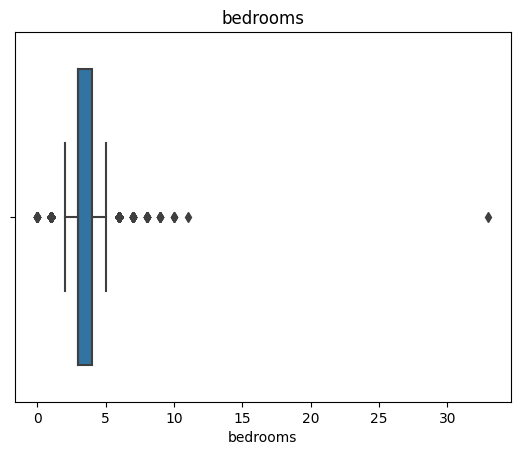

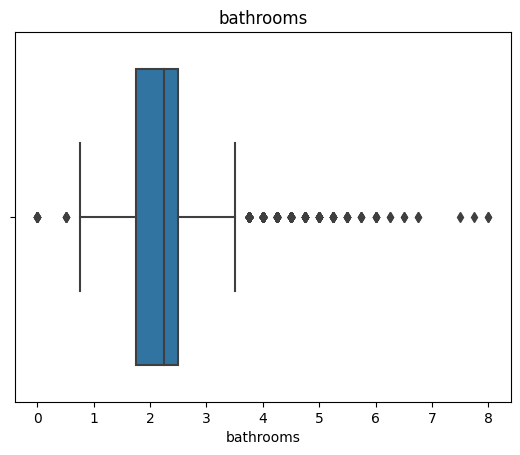

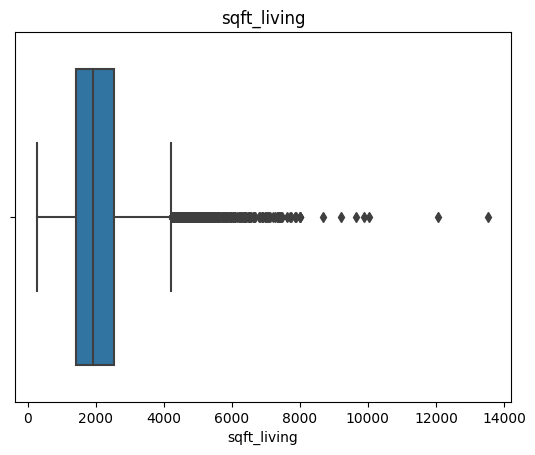

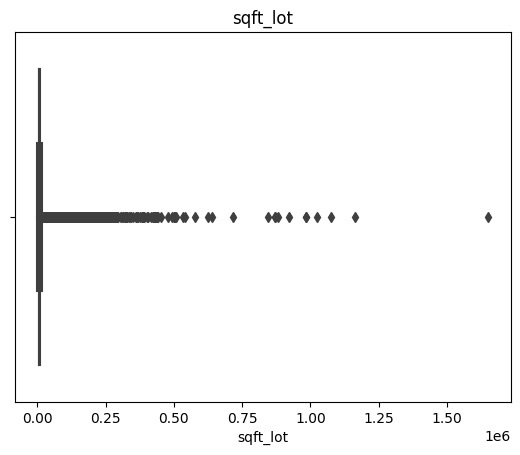

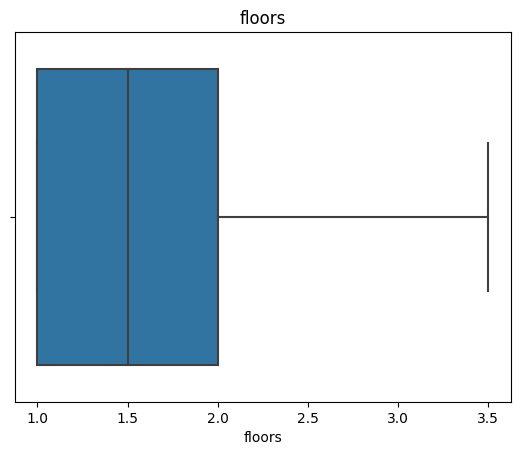

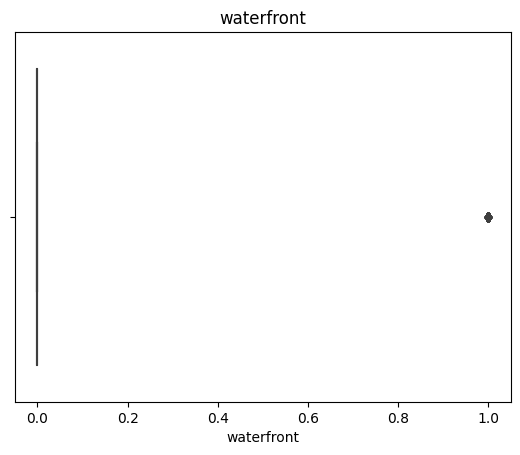

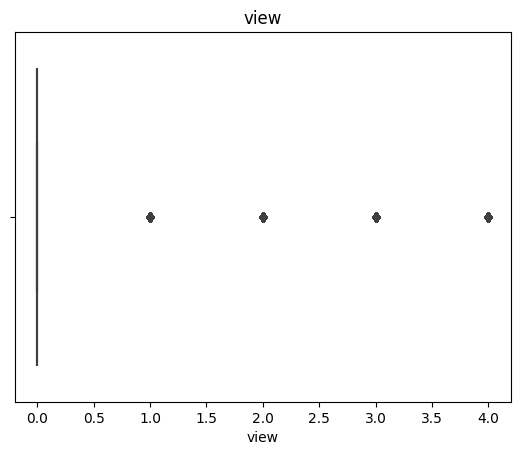

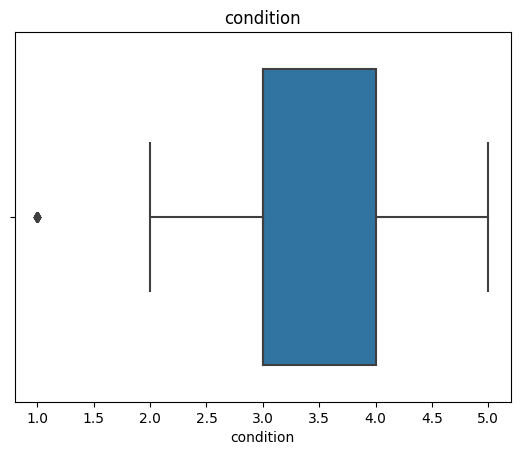

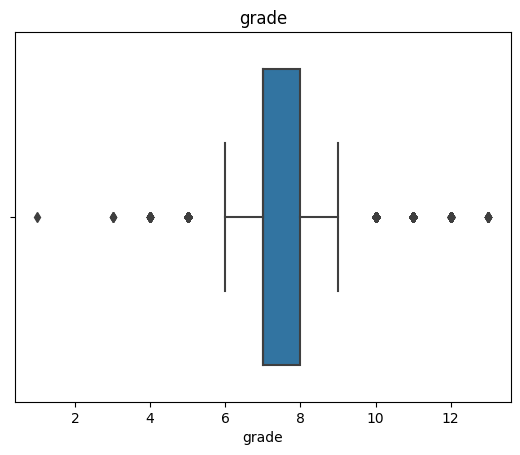

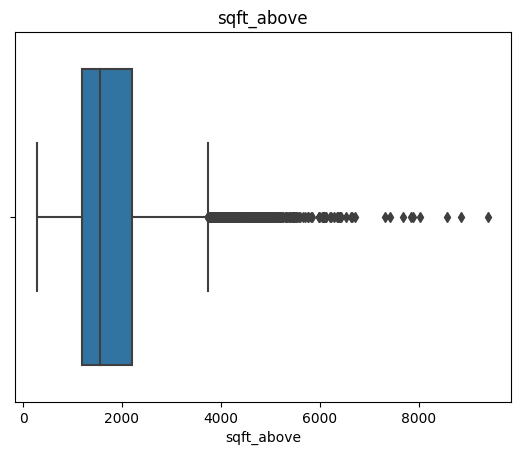

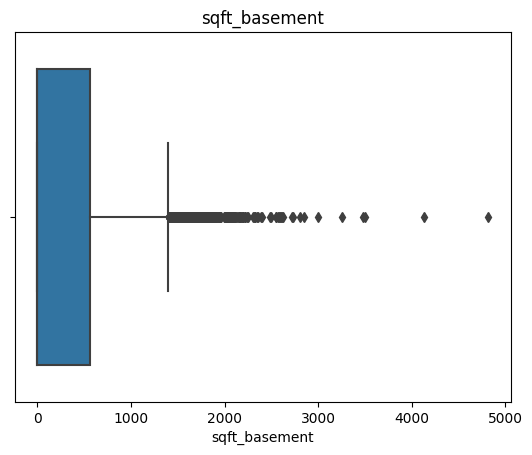

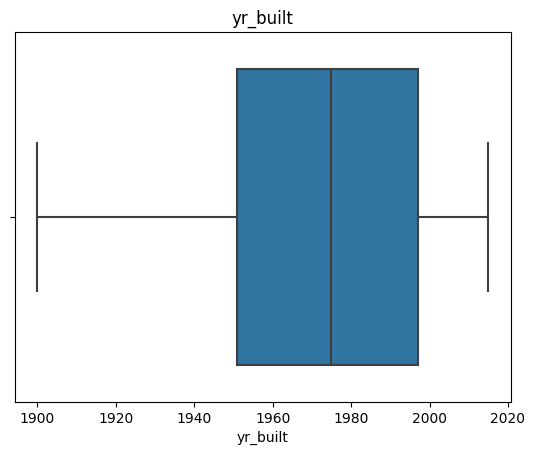

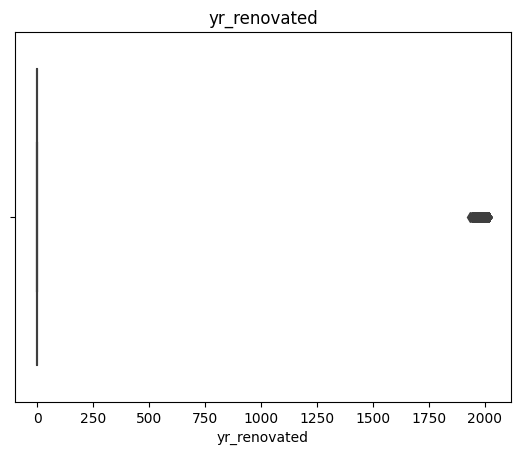

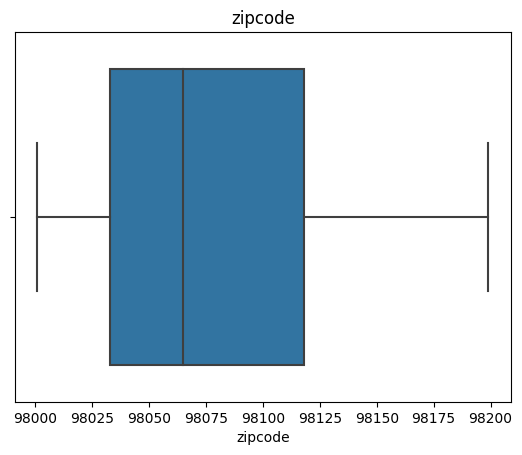

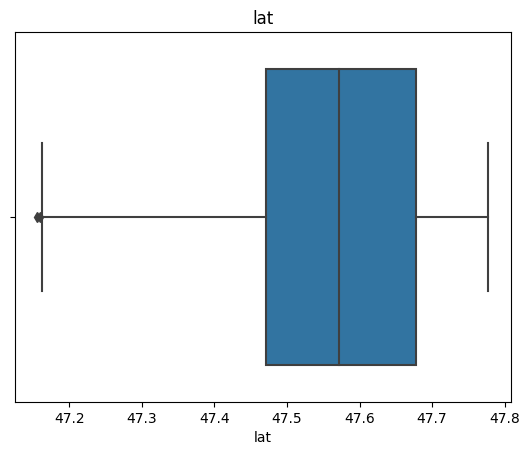

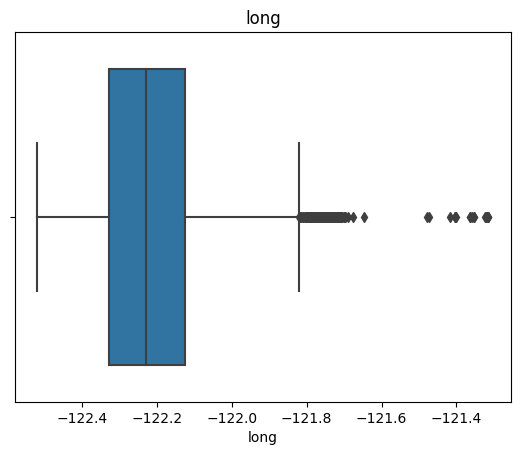

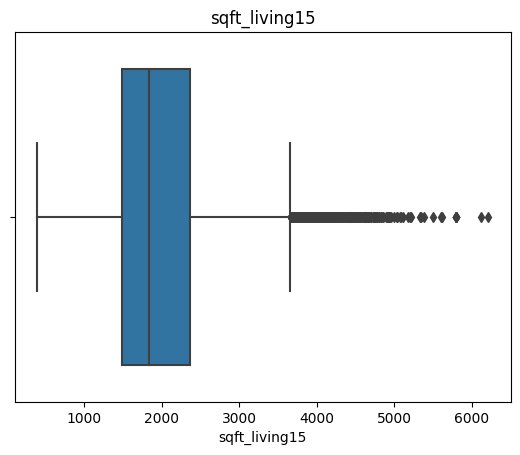

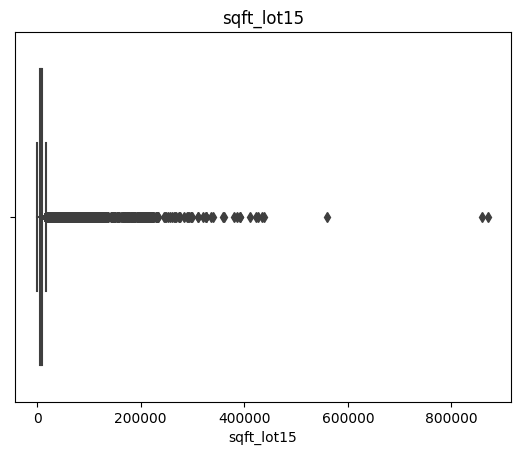

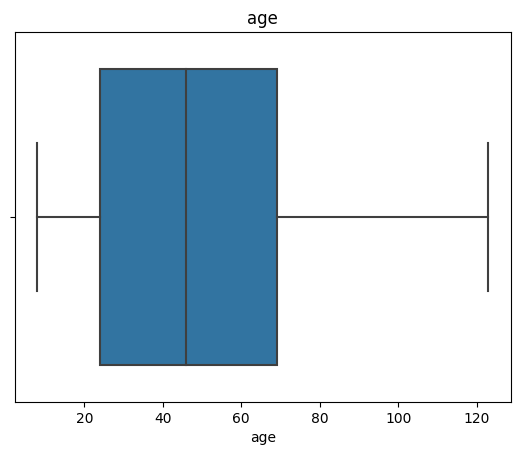

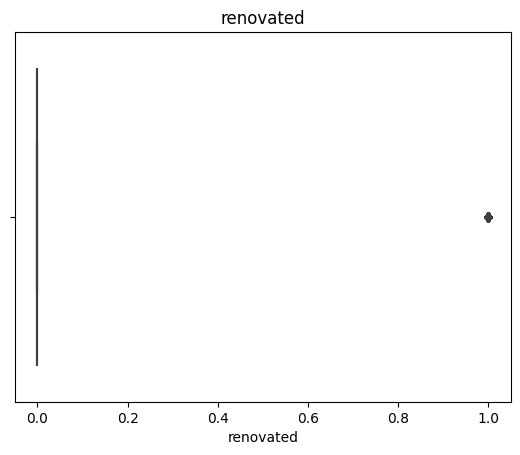

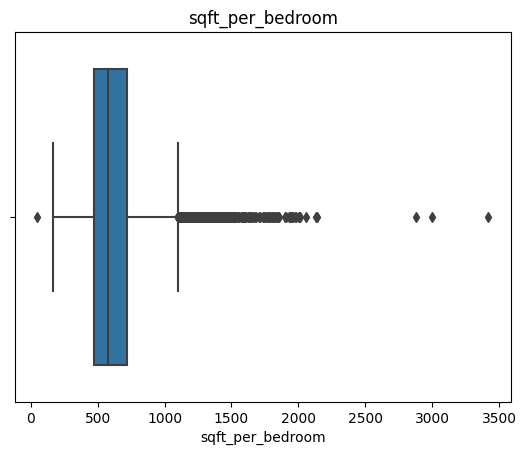

In [ ]:
# plot boxplots for all numerical columns to detect outliers
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
# handle outliers in 'sqft_living', 'sqft_lot', and 'price' columns
df1 = df[(df['sqft_living'] > 200) & (df['sqft_living'] < 8000)]
df1 = df[(df['sqft_lot'] > 500) & (df['sqft_lot'] < 500000)]
df1 = df[(df['price'] > 50000) & (df['price'] < 5000000)]

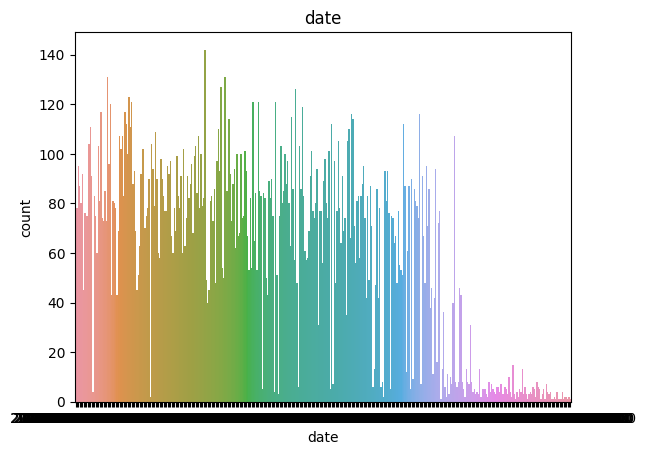

In [ ]:
# plot bar charts for categorical variables
for col in df.select_dtypes(include=['object']):
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(col)
    plt.show()